In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np


# API Example

In [3]:
import requests
import json
import time
N = 10 # Set how many data points you would like. Querying the API for a single data point takes ~ 0.2 s. 
ad_list = ['ad_1', 'ad_2', 'ad_3', 'ad_4', 'ad_5'] 
for ad in ad_list:
    ad_outcome = []
    for i in range (N):
        ad_gen = "https://755vgi76zg.execute-api.us-east-1.amazonaws.com/prod"
        data = {
            "ad": ad
        }

        response = requests.post(ad_gen, json.dumps(data))
        resp = json.loads(response.content)
        generate_ad = resp["body"]
        ad_outcome.append(generate_ad[1])
    print ('ad_outcomes for ', ad, ' = ', ad_outcome)

ad_outcomes for  ad_1  =  ['0', '1', '1', '1', '0', '1', '1', '1', '0', '0']
ad_outcomes for  ad_2  =  ['0', '1', '0', '0', '1', '1', '1', '1', '0', '0']
ad_outcomes for  ad_3  =  ['0', '1', '1', '1', '1', '0', '1', '1', '1', '1']
ad_outcomes for  ad_4  =  ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
ad_outcomes for  ad_5  =  ['0', '0', '0', '1', '0', '0', '0', '0', '0', '0']
ad_outcomes for  ad_6  =  ['n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n']


# Random Selection Results

In [45]:
import random

N = 100
ad_list = ['ad_1', 'ad_2', 'ad_3', 'ad_4', 'ad_5'] 
total_reward = 0
mean_reward = []
for i in range(N):
    ad = random.choice(ad_list)
    ad_gen = "https://755vgi76zg.execute-api.us-east-1.amazonaws.com/prod"
    data = {
        "ad": ad
    }
    response = requests.post(ad_gen, json.dumps(data))
    resp = json.loads(response.content)
    generate_ad = resp["body"]
    total_reward += int(generate_ad[1])
    mean_reward.append(total_reward / (i + 1))
print(total_reward)

42


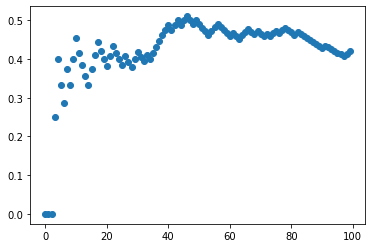

In [46]:
import matplotlib.pyplot as plt

x = [r for r in mean_reward]
y = [_ for _ in range(N)]

plt.scatter(y, x)
plt.show()


# Pick the ad with the highest mean reward

In [50]:
class AdData():
    mean_reward = 1
    num_success = 4
    total_times_shown = 4

    def __str__(self):
        return f"MeanReward: {self.mean_reward}, NumSuccess: {self.num_success}, TotalTimesShown: {self.total_times_shown}"

    def __gt__(self, other):
        return(self.mean_reward > other.mean_reward)

N = 1000
ad_list = ['ad_1', 'ad_2', 'ad_3', 'ad_4', 'ad_5'] 
ad_data = {ad: AdData() for ad in ad_list} 
mean_reward = []
highest_mean_reward = 0
highest_mean_reward_ad = "ad_1"
total_reward = 0
for i in range(N):
    ad = highest_mean_reward_ad
    ad_gen = "https://755vgi76zg.execute-api.us-east-1.amazonaws.com/prod"
    data = {
        "ad": ad
    }
    response = requests.post(ad_gen, json.dumps(data))
    resp = json.loads(response.content)
    ad_reward = int(resp["body"][1])
    total_reward += ad_reward

    ad_data[ad].num_success += ad_reward
    ad_data[ad].total_times_shown += 1
    ad_data[ad].mean_reward = ad_data[ad].num_success / ad_data[ad].total_times_shown

    # print(f"Selected ad: {ad} with reward {ad_reward}. New mean reward is {ad_data[ad].mean_reward}")
    # for ad_ in ad_list:
    #     print(f"    {ad_}: {ad_data[ad_]}") 

    # if ad_data[ad].mean_reward > highest_mean_reward:
    #     highest_mean_reward = ad_data[ad].mean_reward
    #     highest_mean_reward_ad = ad
    highest_mean_reward_ad = max(ad_data, key=ad_data.get)
    highest_mean_reward = ad_data[highest_mean_reward_ad]
    mean_reward.append(total_reward / (i + 1))

print(total_reward)

587


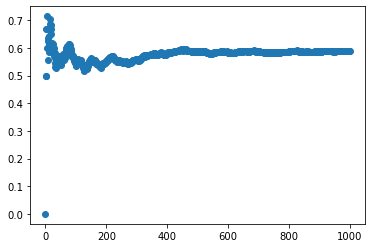

In [51]:
x = [r for r in mean_reward]
y = [_ for _ in range(1000)]

plt.scatter(y, x)
plt.show()

In [20]:
for ad in ad_list:
    print(ad_data[ad].mean_reward)

0.7246376811594203
0.6666666666666666
0.6
0.6666666666666666
0.6


# Collecting Data

In [30]:
rewards = []
for i in range(1000):
    ad = "ad_1"
    ad_gen = "https://755vgi76zg.execute-api.us-east-1.amazonaws.com/prod"
    data = {
        "ad": ad
    }
    response = requests.post(ad_gen, json.dumps(data))
    resp = json.loads(response.content)
    ad_reward = int(resp["body"][1])
    rewards.append(ad_reward)

AttributeError: module 'matplotlib' has no attribute 'scatter'

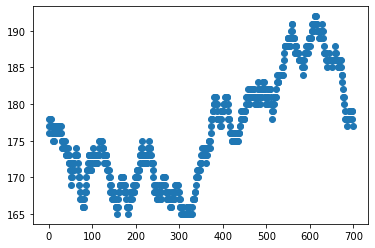

In [41]:
import matplotlib.pyplot as plt

window = 300
x = []
y = [_ for _ in range(1000-window)]
for i in range(1000-window):
    x.append(sum(rewards[i:i+window]))

plt.scatter(y, x)
plt.show()


# e-Greedy method

# Helper Functions and Objects

In [ ]:
class Method():


def run_experiment(steps, method):
    ad_list = ['ad_1', 'ad_2', 'ad_3', 'ad_4', 'ad_5'] 
    for i in range(steps):
        select an ad to pick 
        query for that ad and get a reward
        update the method with that reward and selection

# What's the best ad?